First 5 rows:
                        Game  Year             Genre       Publisher  \
0         Grand Theft Auto V  2014            Action  Rockstar Games   
1  Call of Duty: Black Ops 3  2015           Shooter      Activision   
2      Red Dead Redemption 2  2018  Action-Adventure  Rockstar Games   
3         Call of Duty: WWII  2017           Shooter      Activision   
4                    FIFA 18  2017            Sports       EA Sports   

   North America  Europe  Japan  Rest of World  Global  
0           6.06    9.71   0.60           3.02   19.39  
1           6.18    6.05   0.41           2.44   15.09  
2           5.26    6.21   0.21           2.26   13.94  
3           4.67    6.21   0.40           2.12   13.40  
4           1.27    8.64   0.15           1.73   11.80  

Last 5 rows:
                                     Game  Year         Genre  \
187                     Tales of Berseria  2016  Role-Playing   
188        Yakuza Zero: The Place of Oath  2015     Adventure   
18

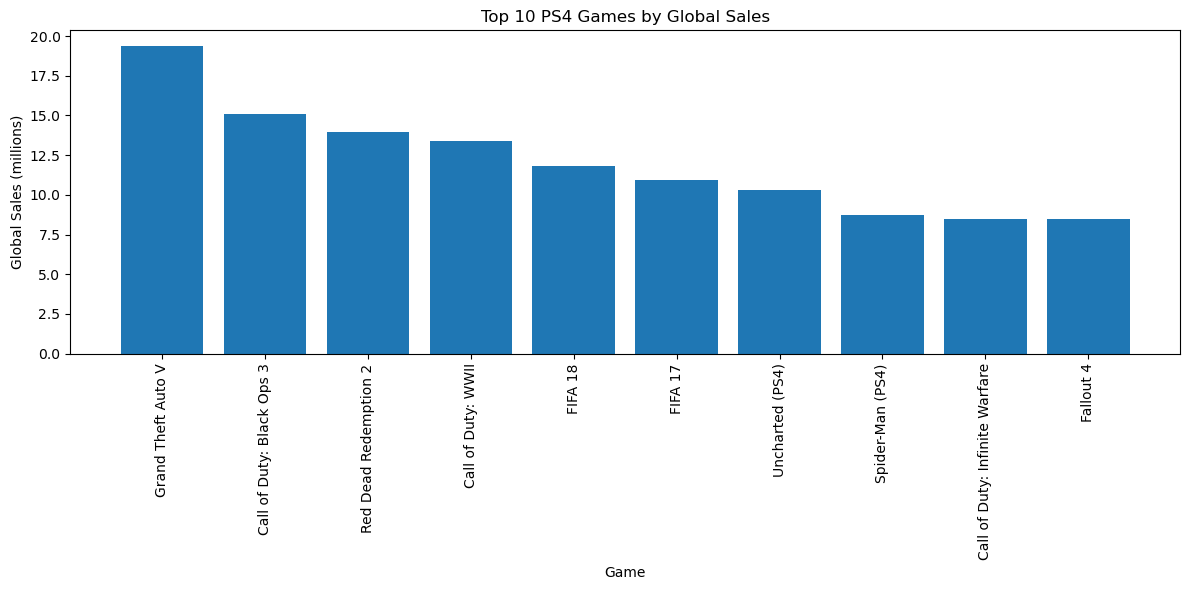

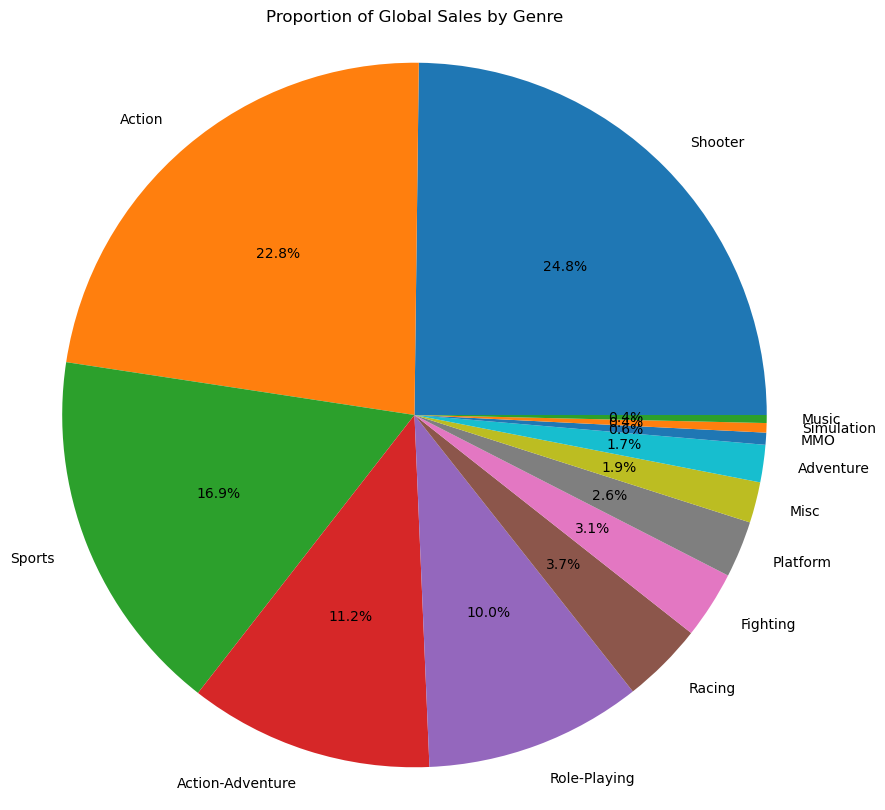


Mean of global sales: 2.69 million
Median of global sales: 1.67 million
Mode of global sales: 0.75 million
Standard deviation of global sales: 2.82 million


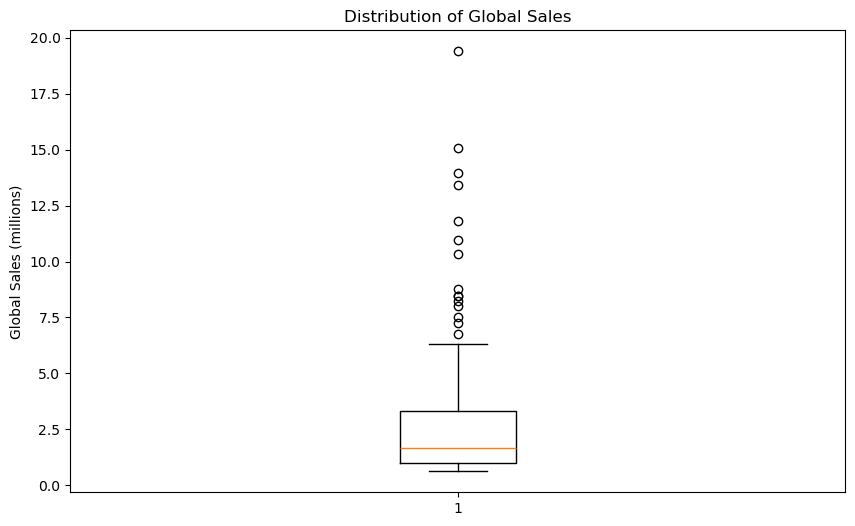


Missing values:
Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

Number of duplicate rows: 0

The dataset is clean and doesn't require any cleaning operations.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset
df = pd.read_csv('PS4_GamesSales.csv', sep=';')

# Task 1: Eksplorasi Data dengan Pandas

# Display first 5 rows
print("First 5 rows:")
print(df.head())

# Display last 5 rows
print("\nLast 5 rows:")
print(df.tail())

# Calculate total number of games sold globally
total_sales = df['Global'].sum()
print(f"\nTotal number of games sold globally: {total_sales:.2f} million")

# Find game with highest and lowest price
# Note: We don't have price data in this dataset, so we'll use global sales instead
max_sales_game = df.loc[df['Global'].idxmax()]
min_sales_game = df.loc[df['Global'].idxmin()]

print(f"\nGame with highest global sales: {max_sales_game['Game']} ({max_sales_game['Global']} million)")
print(f"Game with lowest global sales: {min_sales_game['Game']} ({min_sales_game['Global']} million)")

# Group data by genre and calculate total sales
genre_sales = df.groupby('Genre')['Global'].sum().sort_values(ascending=False)
print("\nTotal sales by genre:")
print(genre_sales)

# Visualization: Bar chart of top 10 games by global sales
top_10_games = df.nlargest(10, 'Global')
plt.figure(figsize=(12, 6))
plt.bar(top_10_games['Game'], top_10_games['Global'])
plt.xticks(rotation=90)
plt.title('Top 10 PS4 Games by Global Sales')
plt.xlabel('Game')
plt.ylabel('Global Sales (millions)')
plt.tight_layout()
plt.show()

# Visualization: Pie chart of sales proportion by genre
plt.figure(figsize=(10, 10))
plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.1f%%')
plt.title('Proportion of Global Sales by Genre')
plt.axis('equal')
plt.show()

# Task 2: Analisis Data dengan Statistik Deskriptif

# Calculate mean, median, and mode of global sales
mean_sales = df['Global'].mean()
median_sales = df['Global'].median()
mode_sales = df['Global'].mode().values[0]

print(f"\nMean of global sales: {mean_sales:.2f} million")
print(f"Median of global sales: {median_sales:.2f} million")
print(f"Mode of global sales: {mode_sales:.2f} million")

# Calculate standard deviation of global sales
std_sales = df['Global'].std()
print(f"Standard deviation of global sales: {std_sales:.2f} million")

# Create a box plot of global sales
plt.figure(figsize=(10, 6))
plt.boxplot(df['Global'])
plt.title('Distribution of Global Sales')
plt.ylabel('Global Sales (millions)')
plt.show()

# Task 3: Membersihkan Data

# Identify missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# If there were duplicates, we would remove them like this:
# df = df.drop_duplicates()

# Since there are no missing values or duplicates in this dataset, 
# we don't need to perform any cleaning operations.

print("\nThe dataset is clean and doesn't require any cleaning operations.")